In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#import cirq
from ibm_quantum_widgets import *
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator, Pauli
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## You need to give the new basis which you in which you want to measure the qubit and automatically it will give a operator in the form of matrix which  we can append just before measurement.

In [18]:
# from the user we want measurement basis
#a=[]
#print("There are two basis vector u1 and u2 ")
u1 =[]
u2 =[]
print("Enter the value of 1st new basis ( in format a+bj) ") #0.70710678 --very important value it is 1/sqrt(2)

for i in range(2):          # A for loop for row entries
    u1.append(complex(input()))
print("---------------------------------------------------")    
print ("First New basis i.e u1 ",u1)
print("---------------------------------------------------") 
print(".\n.\n.")   
print("Enter the value of 2nd new basis (in format a+bj) ") #0.70710678 --very important value it is 1/sqrt(2)

for j in range(2):          # A for loop for row entries
    u2.append(complex(input()))
print("---------------------------------------------------")      
print ("Second New basis i.e v1 ",u2)
print("---------------------------------------------------")

# Z basis 
z1 = [1,0]
z2 = [0,1]

# Calculating the every element of the overlap matrix
x1=[]
x1.append(np.vdot(u1, z1))
x1.append(np.vdot(u1, z2))
x1.append(np.vdot(u2, z1))
x1.append(np.vdot(u2, z2))
#matrix1 = np.conjugate(np.transpose(np.array(x1).reshape(2, 2)))
#matrix1_H1 = np.array(x1).reshape(2, 2)
M = Operator(np.array(x1).reshape(2, 2)) # Coverting Matrix into operators 
#M
#0.70.707106780710678 --very important value it is 1/sqrt(2)0.70710678

Enter the value of 1st new basis ( in format a+bj) 
0.70710678
0.70710678
---------------------------------------------------
First New basis i.e u1  [(0.70710678+0j), (0.70710678+0j)]
---------------------------------------------------
.
.
.
Enter the value of 2nd new basis (in format a+bj) 
0.70710678
-0.70710678
---------------------------------------------------
Second New basis i.e v1  [(0.70710678+0j), (-0.70710678+0j)]
---------------------------------------------------


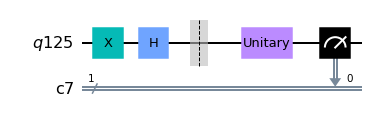

{'1': 1024}

In [19]:
qr1 = QuantumRegister(1)
cr1 = ClassicalRegister(1)
qc1 = QuantumCircuit(qr1,cr1)
qc1.x(qr1)
qc1.h(qr1)
#qc1.sdg(qr1),
qc1.barrier()
qc1.append(M,[0])
qc1.measure(qr1,cr1)
display(qc1.draw('mpl'))
backend_qasm = Aer.get_backend('qasm_simulator')
result = execute(qc1, backend_qasm).result().get_counts(qc1)
result

## Measuring in the Y basis  i.e i|+> and i|->

In [15]:
# from the user we want measurement basis
#a=[]
#print("There are two basis vector u1 and u2 ")
u1 =[]
u2 =[]
print("Enter the value of 1st new basis ( in format a+bj) ") #0.70710678 --very important value it is 1/sqrt(2)

for i in range(2):          # A for loop for row entries
    u1.append(complex(input()))
print("---------------------------------------------------")    
print ("First New basis i.e u1 ",u1)
print("---------------------------------------------------") 
print(".\n.\n.")   
print("Enter the value of 2nd new basis (in format a+bj) ") #0.70710678 --very important value it is 1/sqrt(2)

for j in range(2):          # A for loop for row entries
    u2.append(complex(input()))
print("---------------------------------------------------")      
print ("Second New basis i.e v1 ",u2)
print("---------------------------------------------------")

# Z basis 
z1 = [1,0]
z2 = [0,1]

# Calculating the every element of the overlap matrix
x1=[]
x1.append(np.vdot(u1, z1))
x1.append(np.vdot(u1, z2))
x1.append(np.vdot(u2, z1))
x1.append(np.vdot(u2, z2))
#matrix1 = np.conjugate(np.transpose(np.array(x1).reshape(2, 2)))
#matrix1_H1 = np.array(x1).reshape(2, 2)
M1 = Operator(np.array(x1).reshape(2, 2)) # Coverting Matrix into operators 
#M
#0.70710678 --very important value it is 1/sqrt(2)

Enter the value of 1st new basis ( in format a+bj) 
0.70710678
0.70710678j
---------------------------------------------------
First New basis i.e u1  [(0.70710678+0j), 0.70710678j]
---------------------------------------------------
.
.
.
Enter the value of 2nd new basis (in format a+bj) 
0.70710678
-0.70710678j
---------------------------------------------------
Second New basis i.e v1  [(0.70710678+0j), -0.70710678j]
---------------------------------------------------


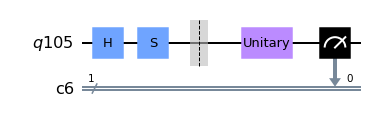

{'0': 1024}

In [17]:
qr1 = QuantumRegister(1)
cr1 = ClassicalRegister(1)
qc1 = QuantumCircuit(qr1,cr1)
#qc1.x(qr1)
# First prepring the Y state 0.70710678
qc1.h(qr1)
qc1.s(qr1),
qc1.barrier()
qc1.append(M1,[0])
qc1.measure(qr1,cr1)
display(qc1.draw('mpl'))
backend_qasm = Aer.get_backend('qasm_simulator')
result = execute(qc1, backend_qasm).result().get_counts(qc1)
result